## LOAN APPROVAL PREDICTION USING MACHINE LEARNING

### Introduction

In [1]:
##In this project, we want to train a machine learning model that will predict if a loan application will be approved or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'white', context = 'talk')
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [3]:
loan = pd.read_csv('loan.csv')
loan.head(10)
#Our task here is to predict an applicant loan approval status using selected features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [6]:
loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
loan['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [10]:
loan['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
loan['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [12]:
loan['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [13]:
loan['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [14]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [15]:
loan['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
loan.shape

(614, 13)

In [18]:
#Verify if any null exist in the dataset
#Some columns have noticeable numbers of NAs

loan.isna().sum()

#Gives the number of missing values in each column.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Create Dictionary to Encode Some Columns

In [19]:
replace_dict = {'Married': {'Yes': 1, 'No':0},
               'Education': {'Graduate':1, 'Not Graduate': 0},
               'Gender': {'Male':1, 'Female': 0},
               'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
               'Self_Employed': {'Yes':1, 'No':0},
               'Loan_Status': {'Y':1, 'N':0},
               'Dependents': {'3+': 4}}

loan = loan.replace(replace_dict)

### Dealing With The Missing Values

In [20]:
###USING SIMPLE IMPUTER METHOD

#Here Strategy = 'most_frequent' which means it will replace missing vales using the most frequent value in the column

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent') #set the imputer

imp.fit(loan['Loan_Amount_Term'].values.reshape(-1,1)) #fit on the imputer

loan['Loan_Amount_Term'] = imp.transform(loan['Loan_Amount_Term'].values.reshape(-1,1)) #transform/replace the missing value in the Loan_Amount_Term column

In [21]:
### Here Strategy = 'mean' which means it will replace missing values using the mean value in the column
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')

imp.fit(loan['LoanAmount'].values.reshape(-1, 1))

loan['LoanAmount'] = imp.transform(loan['LoanAmount'].values.reshape(-1,1))

In [22]:
loan_credit = loan['Credit_History'].values
print(loan_credit)

[ 1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1. nan  0.
  1.  1.  0.  1.  0.  0. nan  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  1.  1.  1.  0. nan  1.  1.  1. nan  1.  1. nan  1.  1.  1.
  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1. nan  1.  1.  1.  1.  0.  1.  1. nan
  1.  1.  0. nan nan  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0. nan  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
  0. nan  1.  1.  1.  1.  0. nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  0. nan  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1

In [23]:
loan_credit.reshape(-1,1)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [nan],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
      

In [24]:
### Here Strategy = 'CONSTANT' which means it will replace missing values using the CONSTANT in the column
imp = SimpleImputer(missing_values=np.nan, strategy = 'constant',fill_value = 1)

imp.fit(loan['Credit_History'].values.reshape(-1, 1))

loan['Credit_History'] = imp.transform(loan['Credit_History'].values.reshape(-1,1))

In [25]:
### Replace missing values in the Gender column with the frequent occuring most frequent
imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')

imp.fit(loan['Gender'].values.reshape(-1, 1))

loan['Gender'] = imp.transform(loan['Gender'].values.reshape(-1,1))

### Here Strategy = 'median' it will replace missing values using the median in some columns

In [26]:

imp = SimpleImputer(missing_values=np.nan, strategy = 'median')

imp.fit(loan['Self_Employed'].values.reshape(-1, 1))

loan['Self_Employed'] = imp.transform(loan['Self_Employed'].values.reshape(-1,1))

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'median')

imp.fit(loan['Dependents'].values.reshape(-1, 1))

loan['Dependents'] = imp.transform(loan['Dependents'].values.reshape(-1,1))

In [28]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'median')

imp.fit(loan['Married'].values.reshape(-1, 1))

loan['Married'] = imp.transform(loan['Married'].values.reshape(-1,1))

In [29]:
#Confirm the strategy
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
#Get to know the datatype for eavh column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [31]:
#View the cleaned dataset
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


### Scaling the Columns

In [32]:
#Scale some columns in our dataset, (do not scale the target column (Loan_Status))
#Most machine learning classifiers prefer this

from sklearn  import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
cols_to_norm = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount']
loan[cols_to_norm] = min_max_scaler.fit_transform(loan[cols_to_norm])

In [33]:
#View the final scaled data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


### Calculating Correlation Matrix

In [34]:
loan_corr = loan.corr()
loan_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170666,-0.104059,-0.047203,-0.012006,0.002474
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.170666,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.104059,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


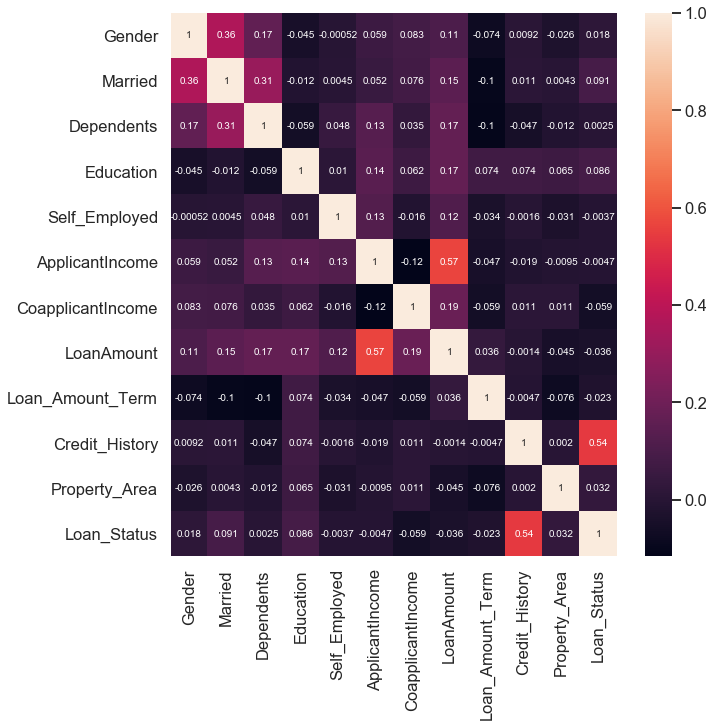

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_corr, annot= True)

The correlation analysis abpve shows that there are high correlations betweem:
    1. Applicant Income and Loan Amount
    2. Credit History and Loan Status

### Applying Feature Correlation to Detect Features with High Correlation with Our Target/Outcome (Loan Status)

In [53]:
#X are all our features (after droping our target 'Loan_Status' and 'Loan_ID')
#Y is the target we are trying to predict (that is Loan_Status)

X = loan.drop(['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan['Loan_Status']

In [54]:
feature_names = X.columns
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [55]:
###Visualizing Feature Correlations

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or lager mutual information with the dependent variable.

C:\Users\Thomas Christopher A\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


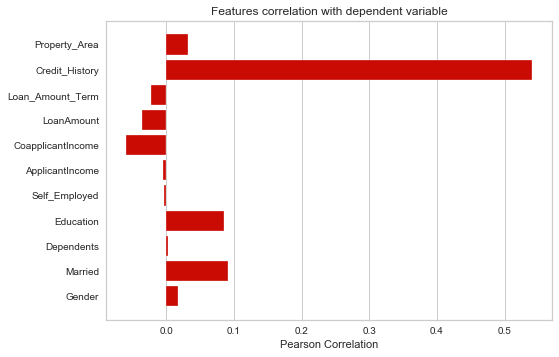

In [56]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels = feature_names, method = 'pearson', color = 'r')
visualizer.fit(X, Y)
visualizer.poof()

In [57]:
visualizer

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000023228F9D208>,
                   color='r', feature_index=None, feature_names=None,
                   labels=Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object'),
                   method='pearson', sort=False)

In [58]:
visualizer.scores_

array([ 0.01798668,  0.09147782,  0.00247405,  0.08588391, -0.00370044,
       -0.00470952, -0.05918731, -0.03641601, -0.02254899,  0.54055607,
        0.03211198])

In [59]:
score_df = pd.DataFrame({'Feature_names': visualizer.features_,
                        'Scores': visualizer.scores_})
score_df

,Feature_names,Scores
0,Gender,0.017987
1,Married,0.091478
2,Dependents,0.002474
3,Education,0.085884
4,Self_Employed,-0.003700
5,ApplicantIncome,-0.004710
6,CoapplicantIncome,-0.059187
7,LoanAmount,-0.036416
8,Loan_Amount_Term,-0.022549
9,Credit_History,0.540556


### Implementing Multiple Machine Learning Algorithms on the Dataset

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Training Various Models for Loan Status Classification

In [71]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

#### Linear Regression

In [72]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_linreg = round(linreg.score(X_train, Y_train)* 100, 2) # Multiply by 100 and round up to 2 d.p
acc_linreg

31.32

In [73]:
acc_linreg_test = round(linreg.score(X_test, Y_test)* 100, 2) # Multiply by 100 and round up to 2 d.p
acc_linreg_test

27.76

Performs poorly because Linear Regression is not suitable for predicting output that has categorical variables

#### Linear Support Vector Classifier

In [77]:
#Linear SVC
#Works quite similar to SVM. The objective of a Linear SVC (Support Vector Classiffier)
#is to fit to the data you provide,
#returning a 'best fit' hyperplane that divides or
#categorizes your data into classes.

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_linear_svc)

Training_Score: 80.65


In [78]:
from sklearn.metrics import accuracy_score

print('Testing_score:', accuracy_score(Y_test, Y_pred)*100)

Testing_score: 83.73983739837398


#### Support Vector Machine

In [81]:
###Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_svc)

Training_Score: 80.65


In [83]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

Testing_score: 82.93


#### Stochastic Gradient Descent 

In [90]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_sgd)

Training_Score: 80.65


In [91]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

Testing_score: 82.93


#### Random Forest

In [92]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 100.0


In [99]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

#Prediction accuracy is low due to overfitting

Testing_score: 64.23


In [94]:
random_forest = RandomForestClassifier(n_estimators = 50)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 100.0


In [95]:
random_forest = RandomForestClassifier(n_estimators = 20)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 100.0


In [96]:
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 97.96


In [97]:
random_forest = RandomForestClassifier(n_estimators = 5)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 96.54


In [98]:
random_forest = RandomForestClassifier(n_estimators = 2)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_random_forest)

Training_Score: 87.98


#### Decision Tree

In [100]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_decision_tree)

Training_Score: 100.0


In [101]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

#Prediction accuracy is low due to overfitting

Testing_score: 70.73


#### K-Nearest Neighbor

In [104]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_knn)

Training_Score: 83.3


In [105]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

Testing_score: 70.73


#### Gaussian Naive Bayes

In [106]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_gaussian)

Training_Score: 79.43


In [107]:
print('Testing_score:', round(accuracy_score(Y_test, Y_pred)*100, 2))

Testing_score: 82.93


#### AdaBoost Classifier

In [120]:
#AdaBoost Classifier
ad = AdaBoostClassifier(n_estimators=100, random_state = 0)
ad.fit(X_train, Y_train)
Y_pred_ad = ad.predict(X_test)
acc_ad = round(ad.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_ad)

Training_Score: 85.13


In [121]:
from sklearn.metrics import accuracy_score

print('Testing_score:', accuracy_score(Y_test, Y_pred_ad)*100)

Testing_score: 82.92682926829268


#### Logistic Regression

In [111]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)
acc_logistic_model = round(logistic_model.score(X_train, Y_train)*100, 2)
print('Training_Score:', acc_logistic_model)

Training_Score: 80.45


In [112]:
from sklearn.metrics import accuracy_score

print('Testing_score:', accuracy_score(Y_test, Y_pred)*100)

Testing_score: 82.92682926829268


In [116]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Logistic Regression', 'Stochastic Gradient Descent', 'Linear SVC', 'Decision Trees', 'AdaBoost'],
                      'Score': [acc_svc, acc_knn, acc_linreg, acc_random_forest, acc_gaussian, acc_logistic_model, acc_sgd, acc_svc, acc_decision_tree, acc_ad]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Decision Trees,100.00
3,Random Forest,87.98
9,AdaBoost,85.13
1,KNN,83.30
0,Support Vector Machines,80.65
6,Stochastic Gradient Descent,80.65
7,Linear SVC,80.65
5,Logistic Regression,80.45
4,Gaussian Naive Bayes,79.43
2,Linear Regression,31.32


The best model here is Adaptive Boosting(AdaBoost). AdaBoost is a popular boosting technique which helps combine multiple 'weak classifiers' into a single 'strong classifier'.


In [124]:
acc_ad_boost = pd.DataFrame({'Predicted': Y_pred_ad,
                            'Actual': Y_test})
acc_ad_boost.head(10)

,Predicted,Actual
454,1,1
52,1,0
536,1,1
469,1,0
55,1,1
62,0,0
539,1,1
432,1,1
367,0,0
482,1,1
